# **Problem Statement**


**We should determine if a given Auto insurence Claim is fraudulent or not for a given set of features. And we should Develop a predictive model for the same.**

### Missing Values
* InsuredGender : Gender - the missing value is represented as “NA”

* PolicyAnnualPremium : Annual Premium – the missing value is represented as “-1”

* TotalCharges : Customer account information (Total). ( For this attribute, missing values are denoted as “MISSINGVAL” also)

* ContractType : Contract type ( For this attribute, missing values are denoted as “NA”)

* TypeOfCollission : Type of Collision - “?” is the missing value

* IncidentTime : time of incident – Hour of the day - the missing value is represented as “-5”

* PropertyDamage : If property damage is there - “?” is the missing value • BodilyInjuries : Number of bodily injuries

* Witnesses : Number of witnesses - missing value is represented as "MISSINGVALUE"

* PoliceReport : If police report available - “?” is the missing value

* AmountOfTotalClaim : Total claim amount - the missing value is represented as “MISSEDDATA”

* VehicleAttributeDetails : Value of the vehicle attribute - the missing value is represented as “???”

# Import Libraries

In [ ]:
# import Libraries
import pandas as pd # For data Analysis
import numpy as np # working with arrays
from sklearn.preprocessing import LabelEncoder #to normalize labels
import matplotlib.pyplot as plt #for visualization
import seaborn as sns # for visualizing

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
#Reading the all train datasets as pandas dataframes
claim_data=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Claim.csv")
Demographics_data=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Demographics.csv")
Policy_data=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Policy.csv")
Vehicle_data=pd.read_csv("/content/drive/MyDrive/TrainData/Train_Vehicle.csv")
Train_data_vt_target=pd.read_csv("/content/drive/MyDrive/TrainData/Traindata_with_Target.csv")

#### Checking the shape of dataset

In [ ]:
#printing the shape of each dataset 
print("Shape of the claim_data :",claim_data.shape)
print("Shape of the Demographics_data :",Demographics_data.shape)
print("Shape of the Policy_data :",Policy_data.shape)
print("Shape of the Vehicle_data :",Vehicle_data.shape)
print("Shape of the Train_data_vt_target :",Train_data_vt_target.shape)

Shape of the claim_data : (28836, 19)
Shape of the Demographics_data : (28836, 10)
Shape of the Policy_data : (28836, 10)
Shape of the Vehicle_data : (115344, 3)
Shape of the Train_data_vt_target : (28836, 2)


Here we found that all the dataset contains 28836 rows except Vehical_data 
so we should check what to do withit and then we should go for merging all the dataset into a single train dataset

In [ ]:
Vehicle_data.head(2)

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu


In [ ]:
(Vehicle_data['CustomerID'].value_counts(),
Vehicle_data['VehicleAttribute'].value_counts(),
Vehicle_data['VehicleAttributeDetails'].value_counts())

(Cust20179    4
 Cust23045    4
 Cust3818     4
 Cust7461     4
 Cust16944    4
             ..
 Cust30090    4
 Cust9783     4
 Cust20478    4
 Cust35879    4
 Cust15237    4
 Name: CustomerID, Length: 28836, dtype: int64, VehicleID       28836
 VehicleModel    28836
 VehicleMake     28836
 VehicleYOM      28836
 Name: VehicleAttribute, dtype: int64, Saab            2415
 Suburu          2313
 Nissan          2300
 Dodge           2263
 Chevrolet       2174
                 ... 
 Vehicle10389       1
 Vehicle17695       1
 Vehicle2852        1
 Vehicle24978       1
 Vehicle19680       1
 Name: VehicleAttributeDetails, Length: 28911, dtype: int64)

From above details we came to know that
* Each customerID is repeating 4 times (Length: 28836*4=115,344)
* VehicleAttribute it has 4 different unique values(details of vehicals )

so customer ID is 4 times connected with this VehicleAttribute hence its repeating, now lets make this 4 rows into columns so that all the details will be in same rows and we can reduce this dataset into 28836 rows from 115,344

### Treating Vehicle_data to match with other train datasets 

In [ ]:
# Checking the data types of different features
print(Vehicle_data.dtypes)
print('---------------------------------------')
print("Total counts of different data ztypes are : ")
print('---------------------------------------')
print(Vehicle_data.dtypes.value_counts())

CustomerID                 object
VehicleAttribute           object
VehicleAttributeDetails    object
dtype: object
---------------------------------------
Total counts of different data ztypes are : 
---------------------------------------
object    3
dtype: int64


In [ ]:
#using pivot_table to reshape Vehicle_data
from pandas.core.reshape.pivot import pivot_table

In [ ]:
Vehicle_data=( Vehicle_data.pivot_table("VehicleAttributeDetails", ["CustomerID"], "VehicleAttribute", aggfunc="first") .reset_index() .rename_axis(columns=None) )

In [ ]:
Vehicle_data.head(3)

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999


In [ ]:
print("print shape:",Vehicle_data.shape)
print("*********************************")
Vehicle_data.dtypes

print shape: (28836, 5)
*********************************


CustomerID      object
VehicleID       object
VehicleMake     object
VehicleModel    object
VehicleYOM      object
dtype: object

Now we reduced 28836 rows from 115,344 rows by using pivot_table,
In this
* we created (VehicleID,VehicleMake,VehicleModel,VehicleYOM)columns and added VehicleAttributeDetails into respected new columns

In [ ]:
#printing the shape of each dataset 
print("Shape of the claim_data :",claim_data.shape)
print("Shape of the Demographics_data :",Demographics_data.shape)
print("Shape of the Policy_data :",Policy_data.shape)
print("Shape of the Vehicle_data :",Vehicle_data.shape)
print("Shape of the Train_data_vt_target :",Train_data_vt_target.shape)

Shape of the claim_data : (28836, 19)
Shape of the Demographics_data : (28836, 10)
Shape of the Policy_data : (28836, 10)
Shape of the Vehicle_data : (28836, 5)
Shape of the Train_data_vt_target : (28836, 2)


Now all the datasets having same rows and now we are ready to merge all datasets into one single data named as "train"

In [ ]:
## merging the dataset usind pd.merge() on "CustomerID"
m1=pd.merge(claim_data,Demographics_data)
m2=pd.merge(m1,Policy_data)
m3=pd.merge(m2,Vehicle_data)
train=pd.merge(m3,Train_data_vt_target)

In [ ]:
train.head(2)

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N


In [ ]:
train.nunique()

CustomerID                    28836
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  4
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     25
NumberOfVehicles                  4
PropertyDamage                    3
BodilyInjuries                    3
Witnesses                         5
PoliceReport                      3
AmountOfTotalClaim            21976
AmountOfInjuryClaim           11958
AmountOfPropertyClaim         11785
AmountOfVehicleDamage         20041
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                     

In [ ]:
train.shape

(28836, 42)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            28836 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28836 non-null  int64  
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              28836 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   288

Now we are sucessfully merged the train data

In [ ]:
train.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud'],
      dtype='object')

In [ ]:
## for num_columns
num_cols = train._get_numeric_data().columns
num_cols

Index(['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit'],
      dtype='object')

In [ ]:
## for cat_columns
cat_cols=train.select_dtypes(include=['object']).columns
cat_cols

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'Country', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud'],
      dtype='object')

## Data Visualization 

Now lets visualize the data by data visualization

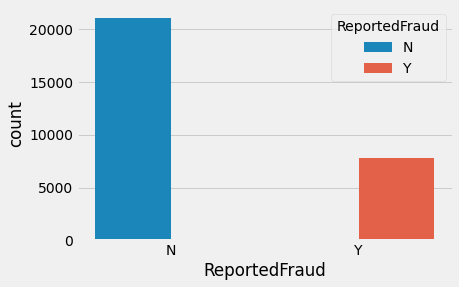

In [ ]:
plt.style.use('fivethirtyeight')
v = sns.countplot(x='ReportedFraud', data=train, hue='ReportedFraud')

In [ ]:
train['ReportedFraud'].value_counts() # Count number of frauds vs non-frauds

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

From this we came to know around 37% of Fraud is Reported , We should try to avoid as many false positives as we can. Let’s try to look for an indicative variable.

In [ ]:
train['Country'].unique()

array(['India', nan], dtype=object)

This dataset only has information from the India, so that’s what we’ll work with.

In [ ]:
train['IncidentState'].value_counts()

State5    7886
State7    7168
State9    6161
State8    3181
State4    3029
State6     810
State3     601
Name: IncidentState, dtype: int64

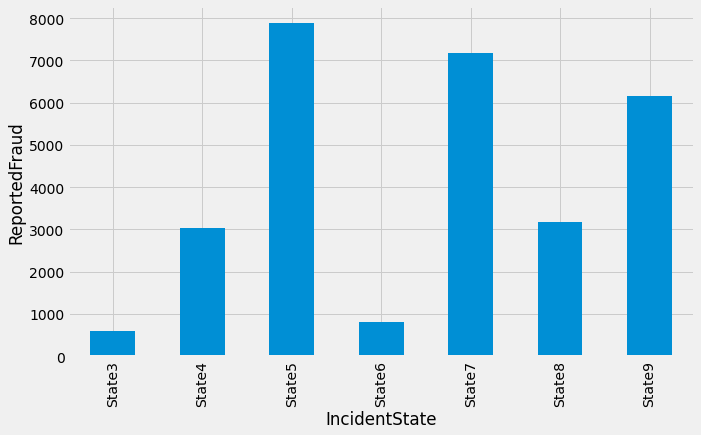

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
v = train.groupby('IncidentState').ReportedFraud.count().plot.bar(ylim=0)
v.set_ylabel('ReportedFraud')
plt.show()

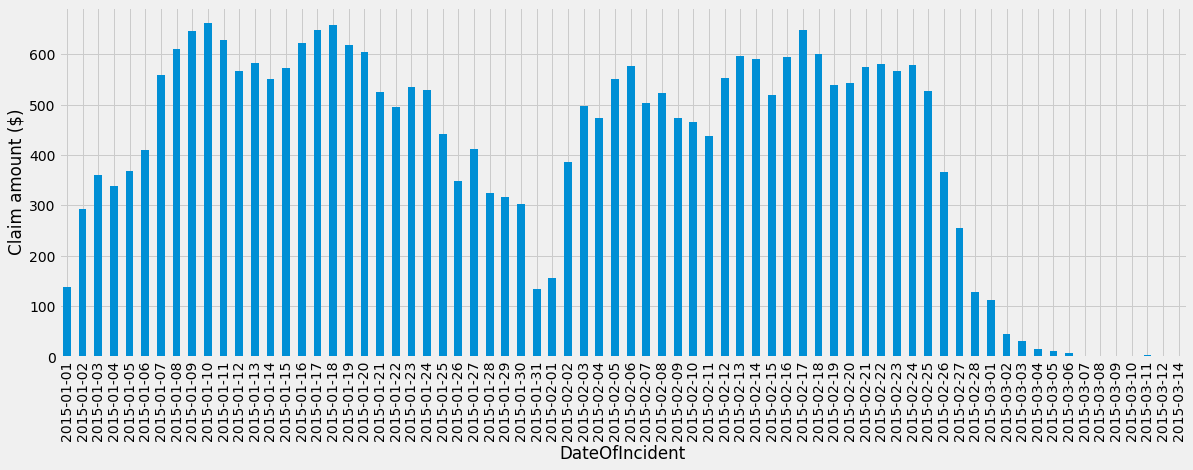

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
v= train.groupby('DateOfIncident').AmountOfTotalClaim.count().plot.bar(ylim=0)
v.set_ylabel('Claim amount ($)')
plt.show()

We see that, all the cases in above plot are mostly form the months of January and February 2015

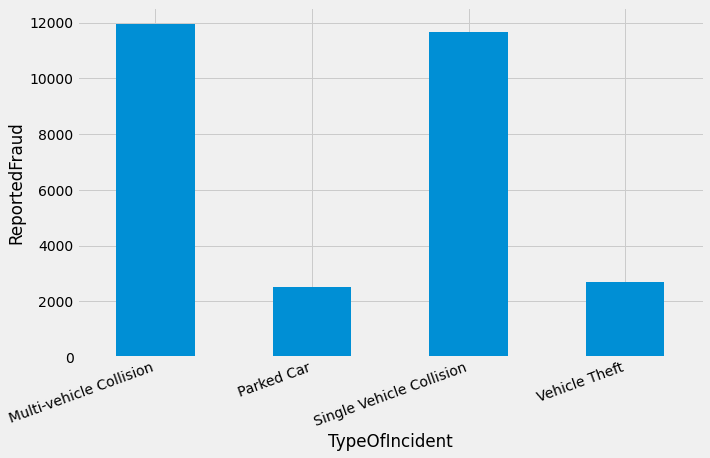

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
v = train.groupby('TypeOfIncident').ReportedFraud.count().plot.bar(ylim=0)
v.set_xticklabels(v.get_xticklabels(), rotation=20, ha="right")
v.set_ylabel('ReportedFraud')
plt.show()

from here we came to know that multi-vehicle and single-vehical collision are claimed more

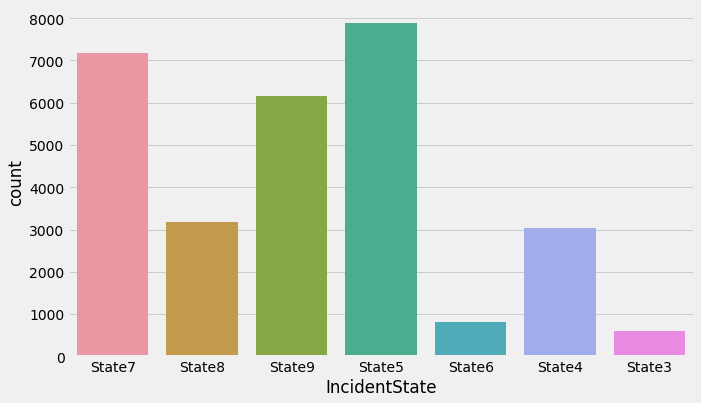

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
v = sns.countplot(x='IncidentState', data=train)

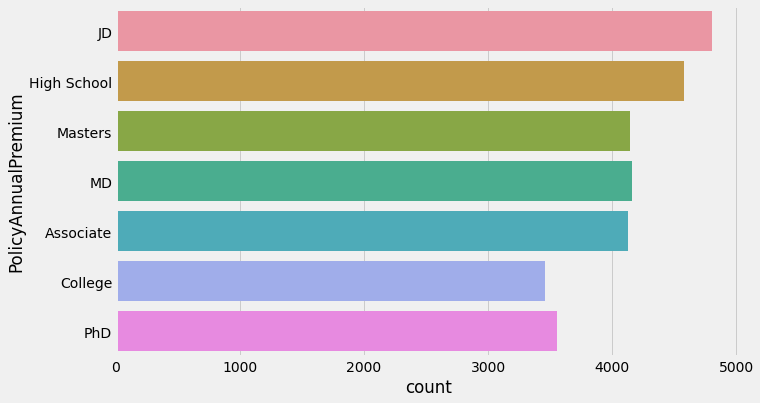

In [ ]:
fig = plt.figure(figsize=(10,6))
v = sns.countplot(y = 'InsuredEducationLevel', data=train) 
v.set_ylabel('PolicyAnnualPremium')
plt.show()

# # Breakdown of Average Vehicle claim by insured's education level, grouped by ReportedFraud

In [ ]:
train["InsuredGender"].value_counts()

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64

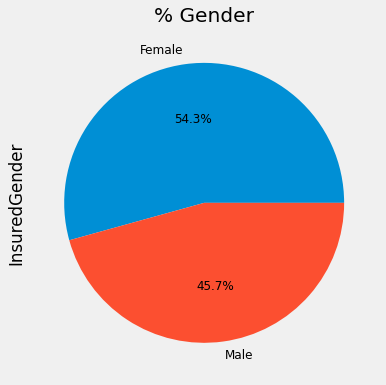

In [ ]:
fig = plt.figure(figsize=(10,6))
v = (train['InsuredGender'].value_counts()*100.0 /len(train))\
.plot.pie(autopct='%.1f%%', labels = ['Female', 'Male'], fontsize=12)                                                                           
v.set_title('% Gender')
plt.show()

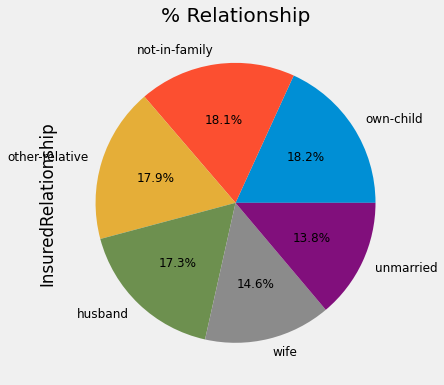

In [ ]:
fig = plt.figure(figsize=(10,6))
v = (train['InsuredRelationship'].value_counts()*100.0 /len(train))\
.plot.pie(autopct='%.1f%%', labels = ['own-child', 'not-in-family','other-relative', 'husband','wife',
       'unmarried'],
         fontsize=12)                                                                           
v.set_title('% Relationship')
plt.show()

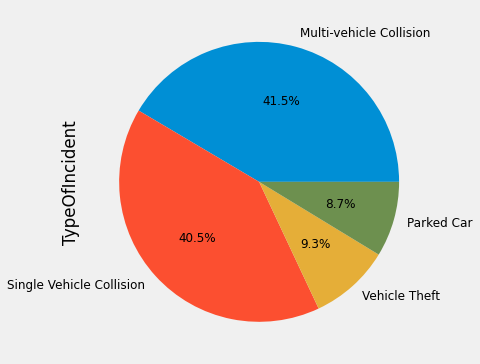

In [ ]:
fig = plt.figure(figsize=(10,6))
v = (train['TypeOfIncident'].value_counts()*100.0 /len(train))\
.plot.pie(autopct='%.1f%%', labels = ['Multi-vehicle Collision', 'Single Vehicle Collision',
       'Vehicle Theft', 'Parked Car'],
         fontsize=12)

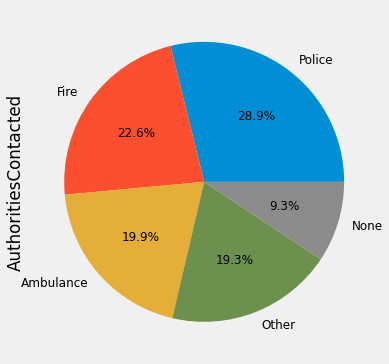

In [ ]:
fig = plt.figure(figsize=(10,6))
v = (train['AuthoritiesContacted'].value_counts()*100.0 /len(train))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Ambulance', 'Other', 'None'],
         fontsize=12)

Here we can see 9.3% AuthoritiesContacted is None

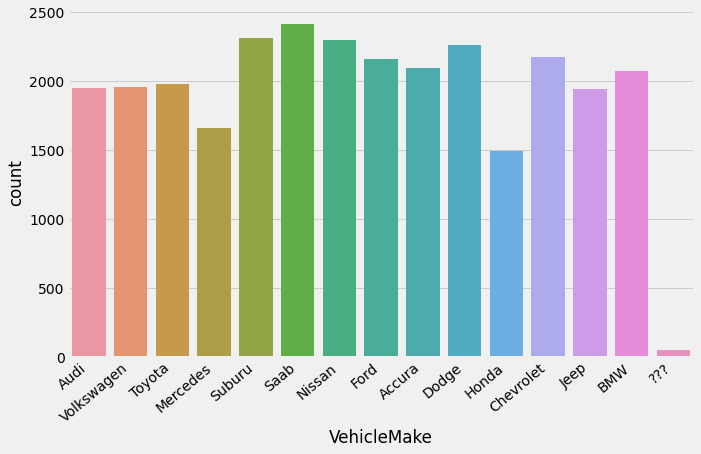

In [ ]:
fig = plt.figure(figsize=(10,6))
v = sns.countplot(x='VehicleMake', data=train)
v.set_xticklabels(v.get_xticklabels(), rotation=40, ha="right")
plt.show()

In this we can see "???" its missing data in VehicleMake feature

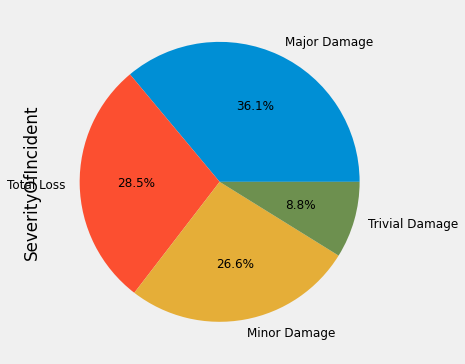

In [ ]:
fig = plt.figure(figsize=(10,6))
v = (train['SeverityOfIncident'].value_counts()*100.0 /len(train))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

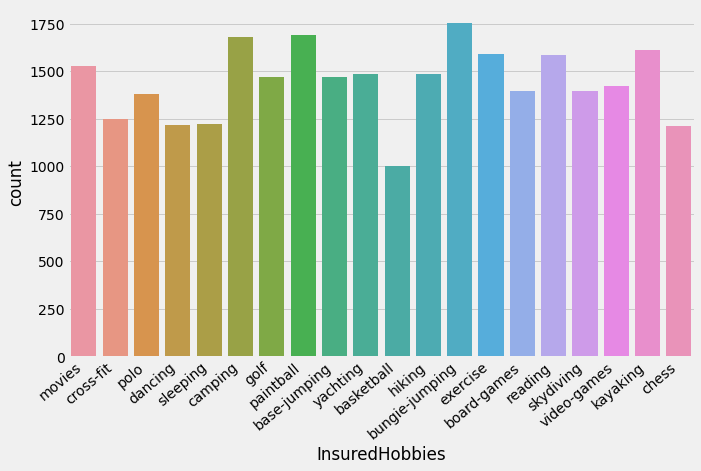

In [ ]:
fig = plt.figure(figsize=(10,6))
v = sns.countplot(x='InsuredHobbies', data=train)
v.set_xticklabels(v.get_xticklabels(), rotation=40, ha="right")
plt.show()

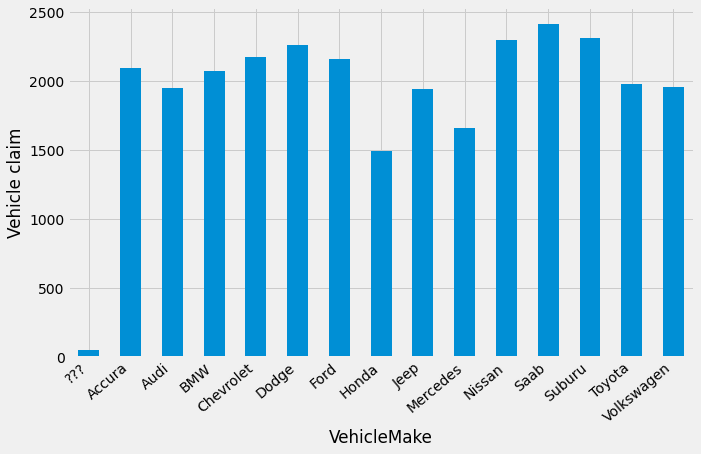

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
v= train.groupby('VehicleMake').AmountOfVehicleDamage.count().plot.bar(ylim=0)
v.set_ylabel('Vehicle claim')
v.set_xticklabels(v.get_xticklabels(), rotation=40, ha="right")
plt.show()

Here also we can see some  missing values in the form of "???"

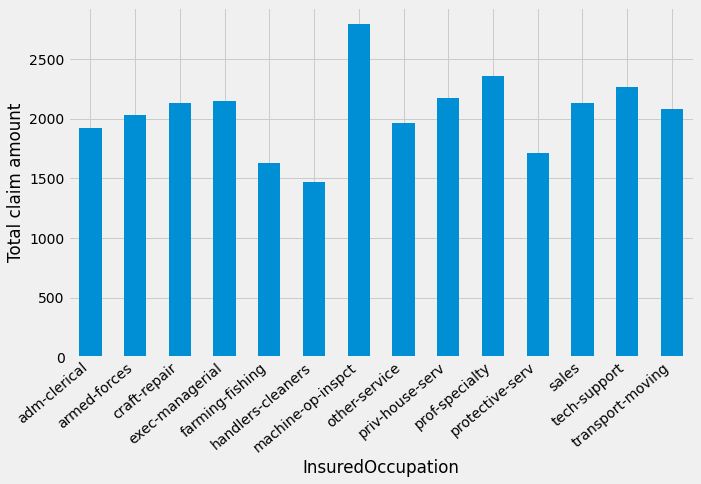

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
v= train.groupby('InsuredOccupation').AmountOfTotalClaim.count().plot.bar(ylim=0)
v.set_ylabel('Total claim amount')
v.set_xticklabels(v.get_xticklabels(), rotation=40, ha="right")
plt.show()

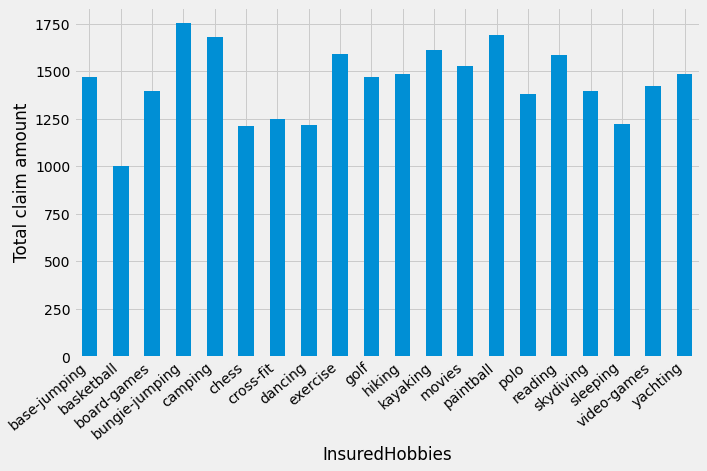

In [ ]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
v= train.groupby('InsuredHobbies').AmountOfTotalClaim.count().plot.bar(ylim=0)
v.set_ylabel('Total claim amount')
v.set_xticklabels(v.get_xticklabels(), rotation=40, ha="right")
plt.show()

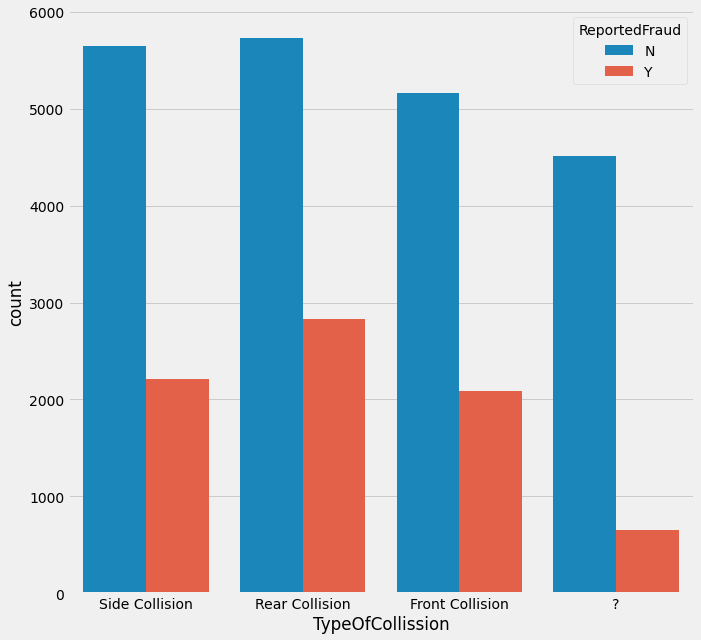

In [ ]:
v= plt.subplots(figsize=(10, 10))
sns.countplot(x='TypeOfCollission',hue='ReportedFraud',data=train)

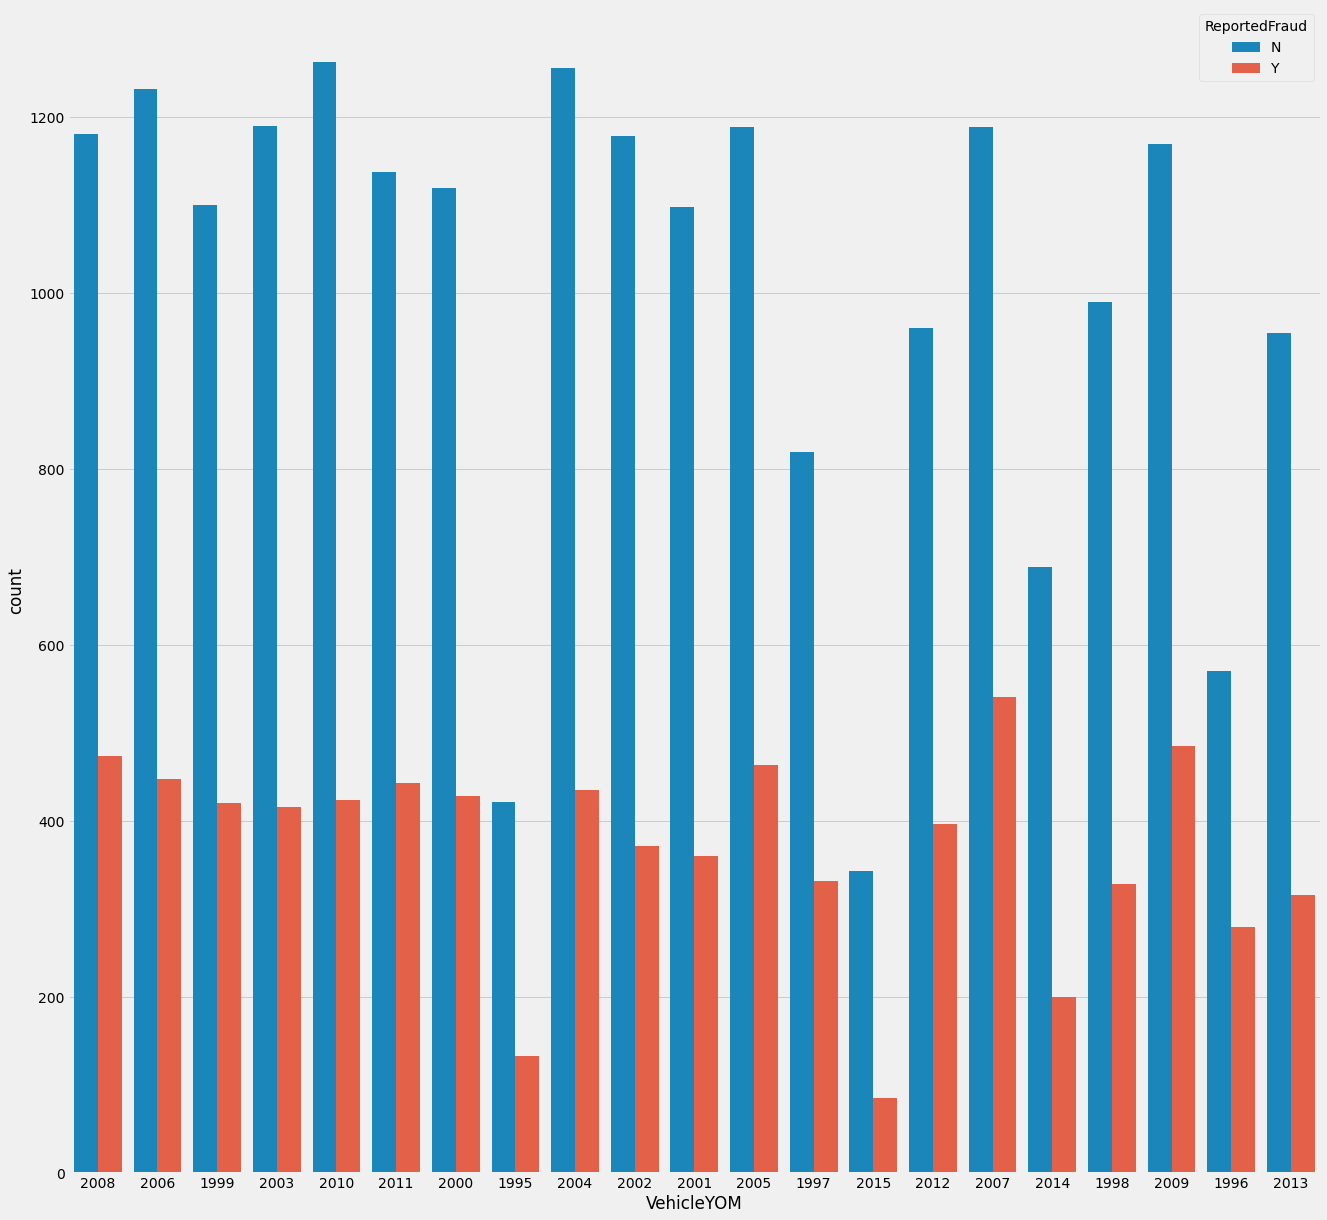

In [ ]:
v= plt.subplots(figsize=(20, 20))
sns.countplot(x='VehicleYOM',hue='ReportedFraud',data=train)

### Data Processing

Cleaning up the data and prepare it for machine learning model.

In [ ]:
train.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud'],
      dtype='object')

In [ ]:
num_cols

Index(['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit'],
      dtype='object')

In [ ]:
cat_cols

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'Country', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud'],
      dtype='object')

# Treating missing values

Given: we know missing values from the given Attributes details pdf that
 missing_values:["MISSEDDATA","NA","?","MISSINGVALUE","???",-5,"MISSINGVAL",-1,"N/A","na",None]

In [ ]:
(train=="?").sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                      0
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                         0
PoliceReport                   9805
AmountOfTotalClaim                0
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                     0
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [ ]:
train["PropertyDamage"].value_counts()

?      10459
NO      9687
YES     8690
Name: PropertyDamage, dtype: int64

As we know missing value is more in this column , hence we can blindly delete this column 

In [ ]:
train["PoliceReport"].value_counts()

NO     9898
?      9805
YES    9133
Name: PoliceReport, dtype: int64

In this coulumn also there are more missing values , lets see weather this column is important are not ,if not we can even drop this

In [ ]:
train["TypeOfCollission"].value_counts()

Rear Collision     8561
Side Collision     7867
Front Collision    7246
?                  5162
Name: TypeOfCollission, dtype: int64

In [ ]:
(train=="???").sum()

CustomerID                     0
DateOfIncident                 0
TypeOfIncident                 0
TypeOfCollission               0
SeverityOfIncident             0
AuthoritiesContacted           0
IncidentState                  0
IncidentCity                   0
IncidentAddress                0
IncidentTime                   0
NumberOfVehicles               0
PropertyDamage                 0
BodilyInjuries                 0
Witnesses                      0
PoliceReport                   0
AmountOfTotalClaim             0
AmountOfInjuryClaim            0
AmountOfPropertyClaim          0
AmountOfVehicleDamage          0
InsuredAge                     0
InsuredZipCode                 0
InsuredGender                  0
InsuredEducationLevel          0
InsuredOccupation              0
InsuredHobbies                 0
CapitalGains                   0
CapitalLoss                    0
Country                        0
InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPoli

In [ ]:
train["VehicleMake"].value_counts()

Saab          2415
Suburu        2313
Nissan        2300
Dodge         2263
Chevrolet     2174
Ford          2158
Accura        2099
BMW           2073
Toyota        1981
Volkswagen    1960
Audi          1952
Jeep          1946
Mercedes      1659
Honda         1493
???             50
Name: VehicleMake, dtype: int64

Replacing all the missing values with NaN values 

In [ ]:
train.replace('?',np.nan,inplace=True)
train.replace(-1,np.nan,inplace=True)
train.replace(-5,np.nan,inplace=True)
train.replace('MISSINGVAL',np.nan,inplace=True)
train.replace('MISSINGVALUE',np.nan,inplace=True)
train.replace('MISSEDDATA',np.nan,inplace=True)
train.replace('???',np.nan,inplace=True)
train.replace('NA',np.nan,inplace=True)
train.replace('N/A',np.nan,inplace=True)
train.replace('na',np.nan,inplace=True)

In [ ]:
train.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

Lets drop CustomerID and PropertyDamage blindly 

In [ ]:
train.drop(['CustomerID','PropertyDamage'],axis = 1, inplace = True)

In [ ]:
train.drop(['Country'],axis=1, inplace= True)

In [ ]:
train["IncidentTime"].unique()

array([17., 10., 22.,  7., 20., 18.,  3.,  5., 14., 16., 15., 13., 12.,
        9., 19.,  4., 11.,  1.,  8.,  0.,  6., 21., 23.,  2., nan])

In [ ]:
train['TypeOfCollission'].fillna(train['TypeOfCollission'].mode()[0],inplace=True)
train['Witnesses'].fillna(train['Witnesses'].median(),inplace=True)
train['Witnesses']=train['Witnesses'].astype(float)
train['PoliceReport'].fillna(train['PoliceReport'].mode()[0],inplace=True)
train['AmountOfTotalClaim'].fillna(train['AmountOfTotalClaim'].median(),inplace=True)
train['AmountOfTotalClaim'] = train['AmountOfTotalClaim'].astype(float)
train['InsuredGender'].fillna(train['InsuredGender'].mode()[0],inplace=True)
train['PolicyAnnualPremium'].fillna(train['PolicyAnnualPremium'].median(),inplace=True)
train['VehicleMake'].fillna(train['VehicleMake'].mode()[0],inplace=True)

In [ ]:
train['IncidentTime'].fillna(train['IncidentTime'].median(),inplace=True)

In [ ]:
train.isnull().sum()

DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAn

we filled all the missing data using mean and median 
now lets convert categorical features into numerical features

# Converying categorical columns to num columns using label encoding

In [ ]:
cat_cols=train.select_dtypes(include=['object']).columns
cat_cols

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PoliceReport', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [ ]:
train.dtypes

DateOfIncident                  int64
TypeOfIncident                  int64
TypeOfCollission                int64
SeverityOfIncident              int64
AuthoritiesContacted            int64
IncidentState                   int64
IncidentCity                    int64
IncidentAddress                 int64
IncidentTime                  float64
NumberOfVehicles                int64
BodilyInjuries                  int64
Witnesses                     float64
PoliceReport                    int64
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                   int64
InsuredEducationLevel           int64
InsuredOccupation               int64
InsuredHobbies                  int64
CapitalGains                    int64
CapitalLoss                     int64
InsurancePolicyNumber           int64
CustomerLoya

In [ ]:
train.shape

(28836, 39)

In [ ]:

#sns.pairplot(train, hue = 'ReportedFraud')  

Now lets find which colum is important and which are not, and lets drop columns which are not impacting on target feature by using Feature importance method

In [ ]:
x=train.drop('ReportedFraud',axis=1)
y=train['ReportedFraud']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.02373202 0.0130434  0.01479869 0.12365835 0.0174704  0.02059075
 0.0183518  0.01869383 0.02160991 0.0138629  0.01885324 0.02001393
 0.01171749 0.02446439 0.02296266 0.02359008 0.0255991  0.02002432
 0.0194157  0.01214816 0.01819334 0.02241422 0.02931478 0.01568852
 0.01598955 0.18525066 0.02134196 0.02193871 0.01525901 0.01707073
 0.02230589 0.02127737 0.01709827 0.01796649 0.01474787 0.01928969
 0.01960308 0.02064872]


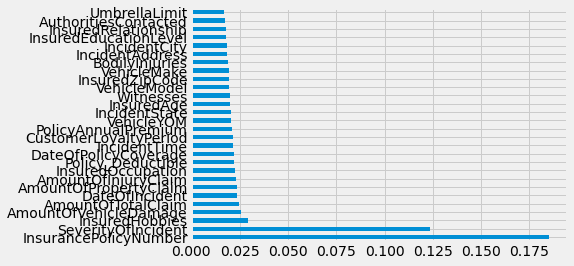

In [ ]:
f=pd.Series(model.feature_importances_,index=x.columns)
f.nlargest(28).plot(kind='barh')
plt.show()

['InsurancePolicyNumber','SeverityOfIncident','InsuredHobbies','AmountOfVehicleDamage','AmountOfTotalClaim',
     'AmountOfPropertyClaim','DateOfIncident','DateOfPolicyCoverage','AmountOfInjuryClaim','InsuredOccupation',
       'Policy_Deductible','IncidentTime','CustomerLoyaltyPeriod','PolicyAnnualPremium',
       'VehicleYOM','InsuredAge','IncidentState','Witnesses','InsuredZipCode','VehicleModel',
       'BodilyInjuries','VehicleMake','IncidentAddress','InsuredEducationLevel',
       'IncidentCity','InsuredRelationship','UmbrellaLimit','Policy_CombinedSingleLimit',
       'AuthoritiesContacted','CapitalLoss','CapitalGains','CapitalGains','TypeOfCollission',
       'VehicleID','NumberOfVehicles','TypeOfIncident','InsuredGender','PoliceReport',
       'PropertyDamage']

In [ ]:
train.drop(['AuthoritiesContacted','Policy_CombinedSingleLimit','CapitalLoss','CapitalGains','TypeOfCollission', 'VehicleID','NumberOfVehicles','TypeOfIncident','InsuredGender','PoliceReport'],axis = 1, inplace = True)

In [ ]:
train.shape

(28836, 29)

In [ ]:
train.dtypes

DateOfIncident             int64
SeverityOfIncident         int64
IncidentState              int64
IncidentCity               int64
IncidentAddress            int64
IncidentTime             float64
BodilyInjuries             int64
Witnesses                float64
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
InsuredAge                 int64
InsuredZipCode             int64
InsuredEducationLevel      int64
InsuredOccupation          int64
InsuredHobbies             int64
InsurancePolicyNumber      int64
CustomerLoyaltyPeriod      int64
DateOfPolicyCoverage       int64
InsurancePolicyState       int64
Policy_Deductible          int64
PolicyAnnualPremium      float64
UmbrellaLimit              int64
InsuredRelationship        int64
VehicleMake                int64
VehicleModel               int64
VehicleYOM                 int64
ReportedFraud              int64
dtype: object

In [ ]:
x = train.drop(['ReportedFraud'],axis = 1)

In [ ]:
y = train['ReportedFraud']

In [ ]:
x.shape

(28836, 28)

### Spliting the train data to train and test 

In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30, shuffle=True)

In [ ]:
# importing metrics to know scores
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [ ]:
# importing Decision Tress Clssifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
print(f"F1 score is {f1_score(y_test, predict)}")
print(f"Accuracy is{accuracy_score(y_test, predict)}")

F1 score is 0.7733913584084551
Accuracy is0.8736130374479889


here we got F1 score=77%  & Accuracy= 87%
* so let us check even for random forest classifier , so we can come to a conclusion that which is best for our model

In [ ]:
# iporting Random Forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=200, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
model = rfc.fit(X_train,y_train) # fit on training data
predict= model.predict(X_test)

print('Baseline: N_features: ', len(list(x.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predict)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, predict),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predict)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predict))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   10.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


Baseline: N_features:  28
Baseline: Accuracy:  92.84
Cohen Kappa: 0.813
Baseline: Recall:  80.3

 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      4174
           1       0.93      0.80      0.86      1594

    accuracy                           0.93      5768
   macro avg       0.93      0.89      0.91      5768
weighted avg       0.93      0.93      0.93      5768



[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


from this we come to know that Random Forest classifier is giving good accuracy and scores compared to Decision tree classifier.

So lets go with Random Forest Classifier for our model

In [ ]:
bc = np.bincount(predict)
bc

array([4389, 1379])

# Test

now do the same process to test 

In [ ]:
#Loading test data
claim_data=pd.read_csv("/content/drive/MyDrive/Test Data/TestData/Test_Claim.csv")
Demographics_data=pd.read_csv("/content/drive/MyDrive/Test Data/TestData/Test_Demographics.csv")
Policy_data=pd.read_csv("/content/drive/MyDrive/Test Data/TestData/Test_Policy.csv")
Vehicle_data=pd.read_csv("/content/drive/MyDrive/Test Data/TestData/Test_Vehicle.csv")

In [ ]:
#reshaping the test data using pivot_table()
Vehicle_data=( Vehicle_data.pivot_table("VehicleAttributeDetails", ["CustomerID"], "VehicleAttribute", aggfunc="first") .reset_index() .rename_axis(columns=None) )

In [ ]:
#merging the test data 
m1=pd.merge(claim_data,Demographics_data)
m2=pd.merge(m1,Policy_data)
test=pd.merge(m2,Vehicle_data)

In [ ]:
#replacing the missing values with nan value
test.replace('?',np.nan,inplace=True)
test.replace(-1,np.nan,inplace=True)
test.replace(-5,np.nan,inplace=True)
test.replace('MISSINGVAL',np.nan,inplace=True)
test.replace('MISSINGVALUE',np.nan,inplace=True)
test.replace('MISSEDDATA',np.nan,inplace=True)
test.replace('???',np.nan,inplace=True)
test.replace('NA',np.nan,inplace=True)
test.replace('N/A',np.nan,inplace=True)
test.replace('na',np.nan,inplace=True)

In [ ]:
test.isnull().sum()

CustomerID                       0
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     7
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                       12
PoliceReport                  3014
AmountOfTotalClaim               8
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
Country                          4
InsurancePolicyNumbe

In [ ]:
#repacing nan values with values using mode() & median()
test['TypeOfCollission'].fillna(test['TypeOfCollission'].mode()[0],inplace=True)
test['Witnesses'].fillna(test['Witnesses'].median(),inplace=True)
test['Witnesses']=test['Witnesses'].astype(float)
test['PoliceReport'].fillna(test['PoliceReport'].mode()[0],inplace=True)
test['AmountOfTotalClaim'].fillna(test['AmountOfTotalClaim'].median(),inplace=True)
test['AmountOfTotalClaim'] = test['AmountOfTotalClaim'].astype(float)
test['InsuredGender'].fillna(test['InsuredGender'].mode()[0],inplace=True)
test['PolicyAnnualPremium'].fillna(test['PolicyAnnualPremium'].median(),inplace=True)
test['VehicleMake'].fillna(test['VehicleMake'].mode()[0],inplace=True)
test['IncidentTime'].fillna(test['IncidentTime'].median(),inplace=True)

In [ ]:
test.isnull().sum()

CustomerID                       0
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission                 0
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     0
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                        0
PoliceReport                     0
AmountOfTotalClaim               0
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    0
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
Country                          4
InsurancePolicyNumbe

In [ ]:
# removing unwanted columns
test.drop(['Country','PropertyDamage'],axis = 1, inplace = True)

In [ ]:
cust=test['CustomerID']

In [ ]:
test = test.drop(['CustomerID'],axis = 1)

In [ ]:
cat_cols=test.select_dtypes(include=['object']).columns
cat_cols

Index(['DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PoliceReport', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleID',
       'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    test[col]= le.fit_transform(test[col])

In [ ]:
test.drop(['AuthoritiesContacted','Policy_CombinedSingleLimit','CapitalLoss','CapitalGains','TypeOfCollission', 'VehicleID','NumberOfVehicles','TypeOfIncident','InsuredGender','PoliceReport'],axis = 1, inplace = True)

In [ ]:
test.shape

(8912, 28)

In [ ]:
x.shape

(28836, 28)

In [ ]:
test.dtypes

DateOfIncident             int64
SeverityOfIncident         int64
IncidentState              int64
IncidentCity               int64
IncidentAddress            int64
IncidentTime             float64
BodilyInjuries             int64
Witnesses                float64
AmountOfTotalClaim       float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
InsuredAge                 int64
InsuredZipCode             int64
InsuredEducationLevel      int64
InsuredOccupation          int64
InsuredHobbies             int64
InsurancePolicyNumber      int64
CustomerLoyaltyPeriod      int64
DateOfPolicyCoverage       int64
InsurancePolicyState       int64
Policy_Deductible          int64
PolicyAnnualPremium      float64
UmbrellaLimit              int64
InsuredRelationship        int64
VehicleMake                int64
VehicleModel               int64
VehicleYOM                 int64
dtype: object

# Model Training

In [ ]:
# importing MinMaxScaler() for normalization
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
xtrain = scale.fit_transform(x)#normalizing the x data (values ranging from 0-1)
xtest = scale.fit_transform(test)#normalizing the test data (values ranging from 0-1)

In [ ]:
# from sklearn importing RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=200, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
rfcg = rfc.fit(xtrain,y) # fit on training data




[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.7s finished


In [ ]:
rfc.score(xtrain,y)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.0s finished


1.0

In [ ]:
#predicting the dependent variable
Y_pred = rfc.predict(xtest)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished


In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#to see number of 0's and 1's present
bc = np.bincount(Y_pred)
bc

array([7535, 1377])

In [ ]:
final = pd.DataFrame({'CustomerID':cust,'ReportedFraud':Y_pred})
final

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust9984,0
8908,Cust9986,0
8909,Cust9990,0
8910,Cust9995,0


In [ ]:
final.to_csv('final_one.csv', index = False)

In [ ]:
view = pd.read_csv('final_one.csv')
view

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust9984,0
8908,Cust9986,0
8909,Cust9990,0
8910,Cust9995,0


# Conclusion 

Here i used Random Forest Classifier for my problem and i got
7525(0's) as not reported fraud as  1387(1's) as reported Fraud 